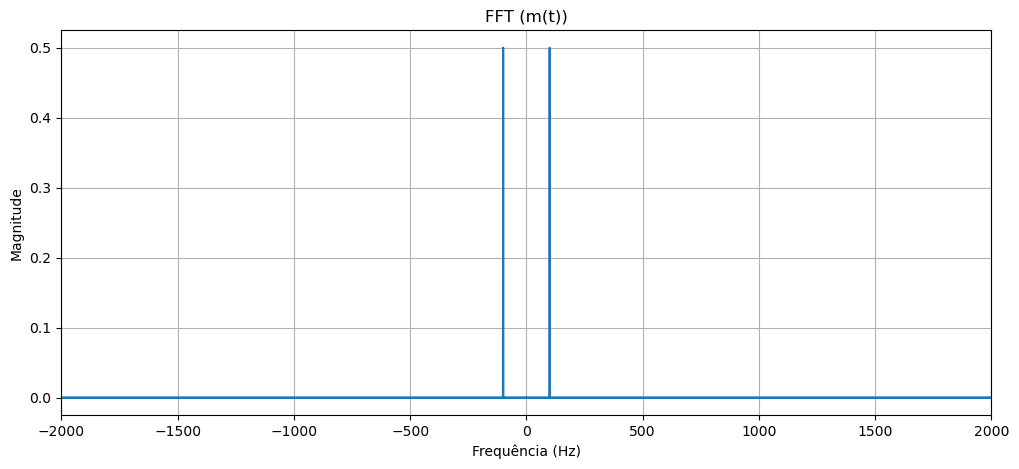

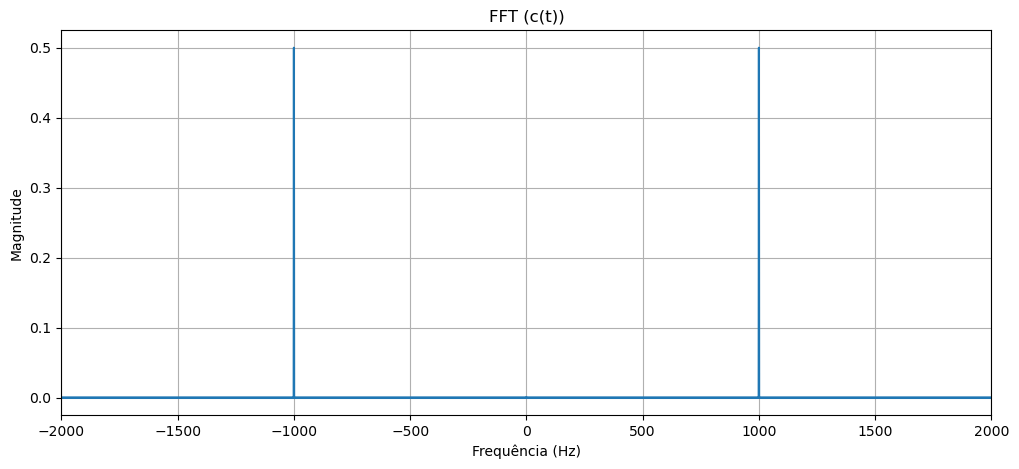

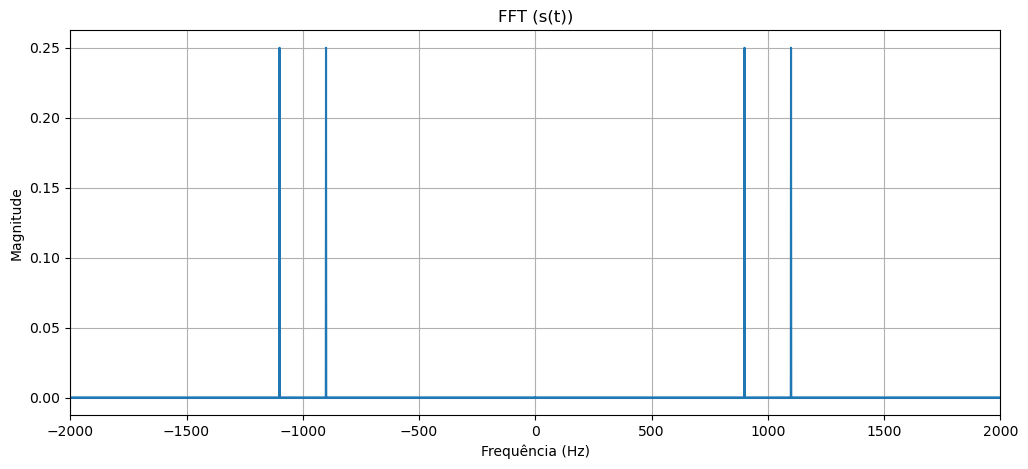

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math

# Definindo os parâmetros
fc = 1000  # Frequência da portadora (Hz)
fm = 100  # Frequência da mensagem (Hz)
fs = 10000  # Frequência de amostragem (Hz)
t = np.arange(0, 1, 1/fs)  # Vetor de tempo de 0 a 1 segundo
Ac = 1  # Amplitude da portadora
# Mensagem (sinal de entrada)

m = np.cos(2 * np.pi * fm * t)  # Sinal de mensagem
# Portadora (sinal de portadora)
c = np.cos(2 * np.pi * fc * t)  # Sinal de portadora
# Sinal modulado (AM DSB-SC)
s = m * Ac* c  # Sinal modulado


def plot_fft_full(signal, fs, title, xlim=(-2000, 2000)):
    N = len(signal)
    S = np.fft.fft(signal)
    S_mag = np.abs(S) / N  # Normalização
    f = np.fft.fftfreq(N, 1/fs)
    plt.figure(figsize=(12, 5))
    plt.plot(f, S_mag)
    plt.title(title)
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(xlim)
    plt.grid()
    plt.savefig(f'{title}_full.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_fft_full(m, fs, 'FFT (m(t))', xlim=(-2000, 2000))
plot_fft_full(c, fs, 'FFT (c(t))', xlim=(-2000, 2000))
plot_fft_full(s, fs, 'FFT (s(t))', xlim=(-2000, 2000))


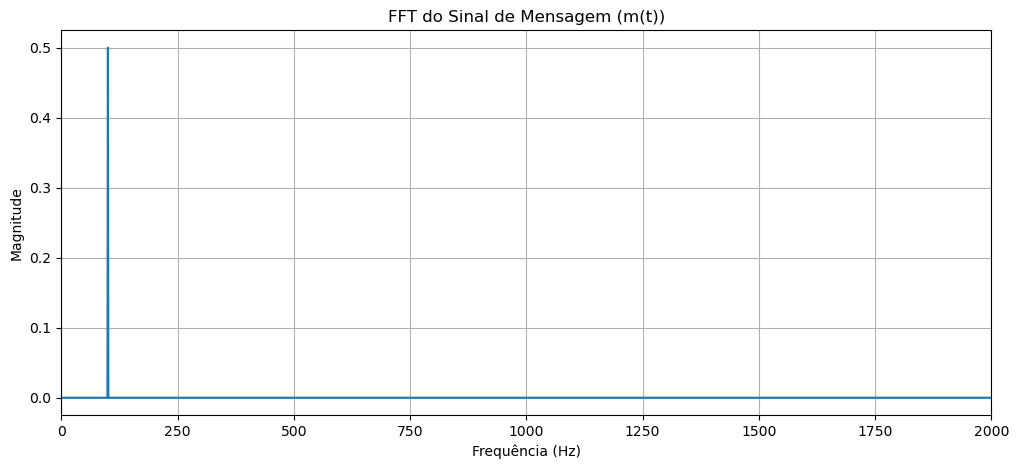

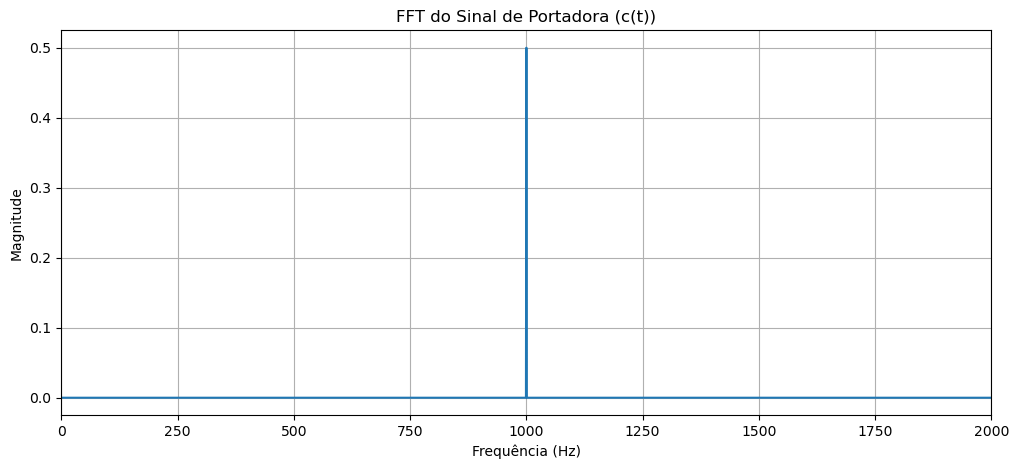

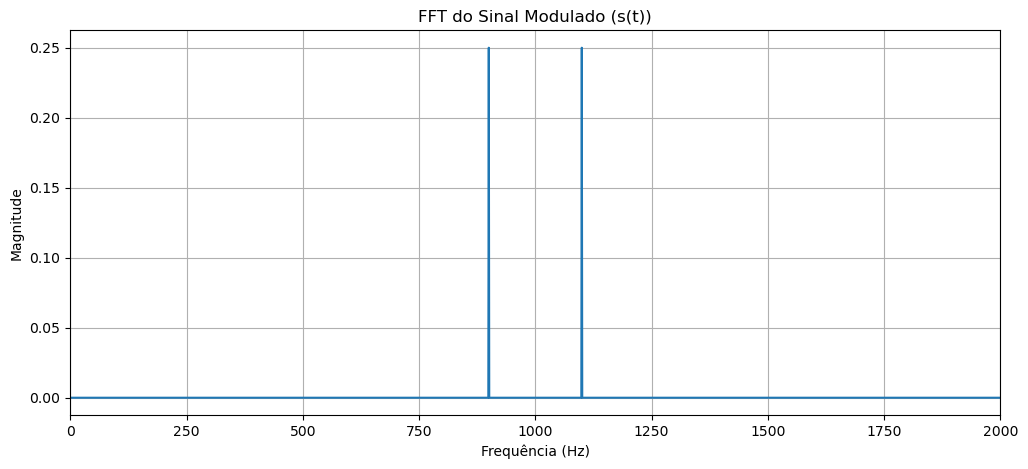

In [2]:
def plot_fft(signal, fs, title, xlim=(0, 2000)):
    N = len(signal)
    f = np.fft.rfftfreq(N, 1/fs)
    S = np.fft.rfft(signal)
    S_mag = np.abs(S) / N  # Normalização
    plt.figure(figsize=(12, 5))
    plt.plot(f, S_mag)
    plt.title(title)
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(xlim)
    plt.grid()
    plt.show()

plot_fft(m, fs, 'FFT do Sinal de Mensagem (m(t))')
plot_fft(c, fs, 'FFT do Sinal de Portadora (c(t))')
plot_fft(s, fs, 'FFT do Sinal Modulado (s(t))')


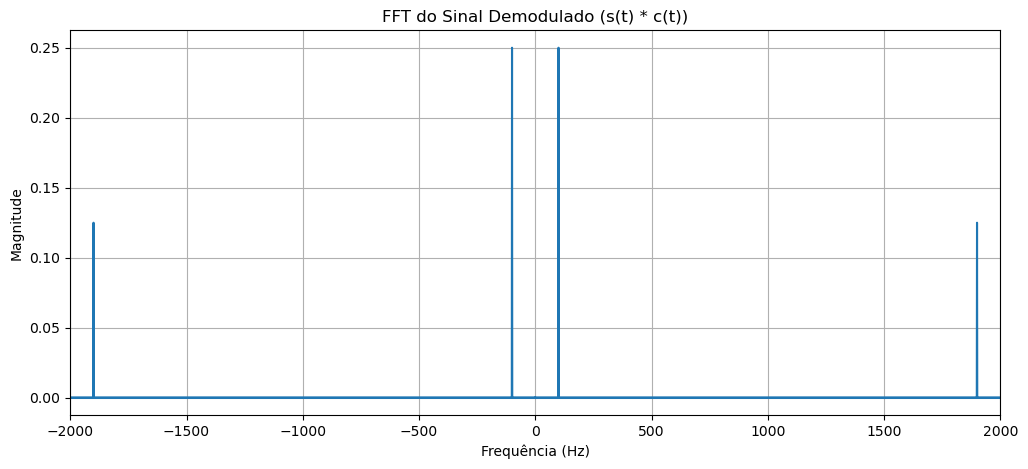

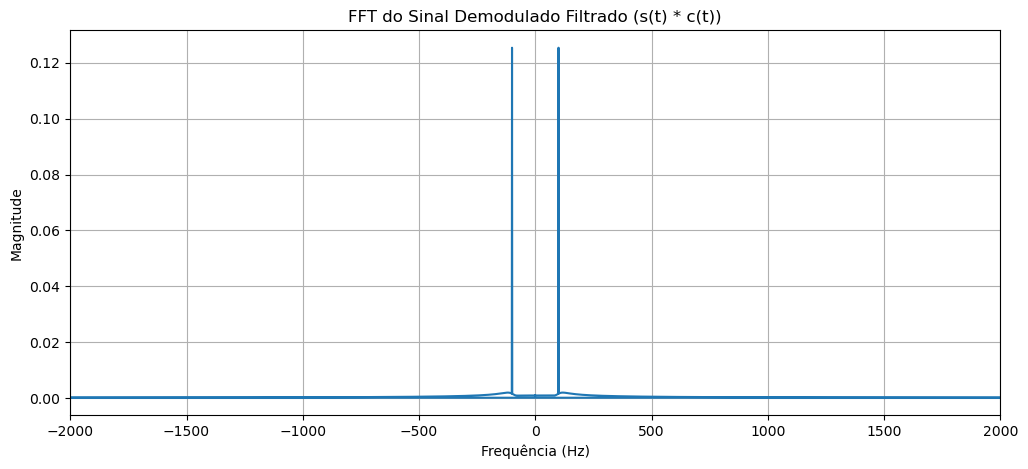

In [13]:
# Demodulação AM DSB-SC

# Multiplicação do sinal modulado pela portadora
demodulated = s * c  # Sinal demodulado
# Filtro passa-baixa para recuperar a mensagem
b, a = signal.butter(5, 2*fm/fs, btype='low')
demodulated_filtered = signal.filtfilt(b, a, demodulated)  # Sinal filtrado

# Plotando o sinal demodulado na frequência
plot_fft_full(demodulated, fs, 'FFT do Sinal Demodulado (s(t) * c(t))')
plot_fft_full(demodulated_filtered, fs, 'FFT do Sinal Demodulado Filtrado (s(t) * c(t))')

